# 의료비 예측
 - target : 의료비 - 수치형

## 1. 환경준비

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
path = 'https://bit.ly/InsuranceFile'
data = pd.read_csv(path)

## 2. 데이터 탐색

#### 1) 데이터 확인

In [3]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [4]:
data.tail(3)

,age,sex,bmi,children,smoker,region,charges
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


#### 2) 변수 정보 확인

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


#### 3) 기초통계정보 확인

In [6]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### 4) 결측치 확인

In [7]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### 5) 상관관계 확인

In [8]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


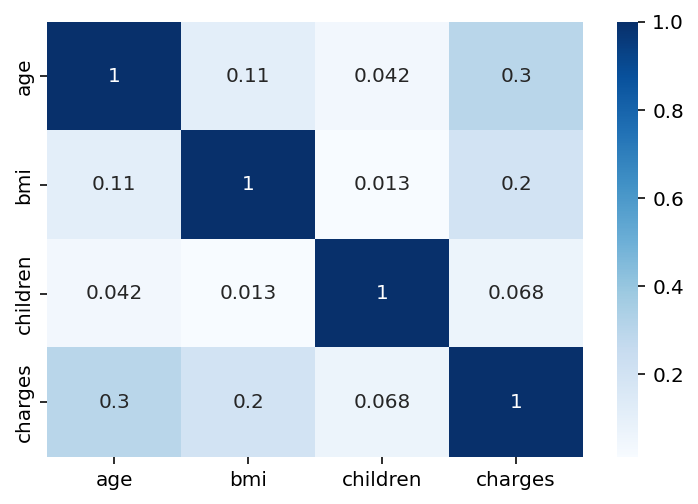

In [10]:
sns.heatmap(data.corr(),
           annot=True, cmap='Blues')
plt.show()

#### 6) 범주값 변수 확인

In [11]:
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [15]:
print(data['sex'].value_counts())
print('-'*70)
print(data['smoker'].value_counts())
print('-'*70)
print(data['region'].value_counts())

male      676
female    662
Name: sex, dtype: int64
----------------------------------------------------------------------
no     1064
yes     274
Name: smoker, dtype: int64
----------------------------------------------------------------------
southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64


#### 7) 주요 변수 확인

7-1) charges(target)

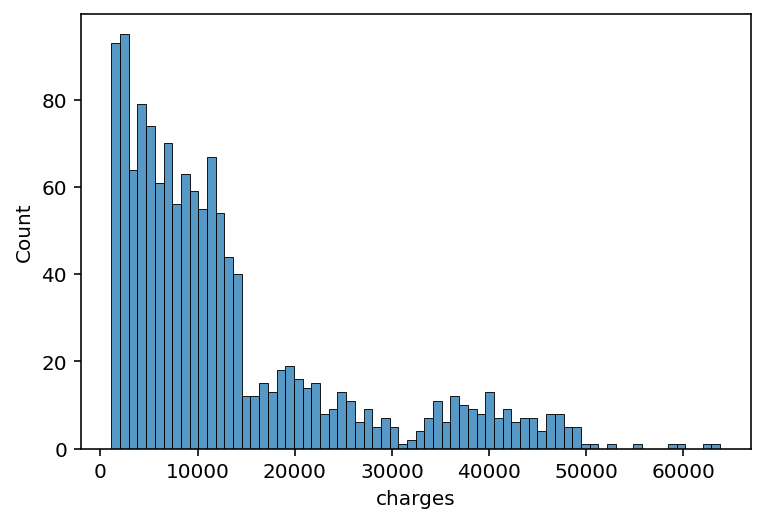

In [17]:
sns.histplot(data=data, x='charges', bins=70)
plt.show()

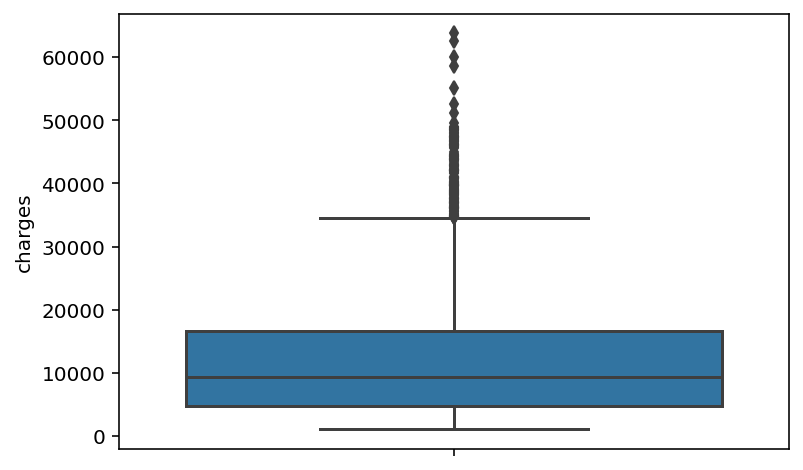

In [19]:
sns.boxplot(data=data, y='charges')
plt.show()

- 세 집단으로 나눠 분석해볼 수 있다.
- 약 35,000 이상이 이상치로 잡힌다.

7-2) age, charges 변수간 상관관계

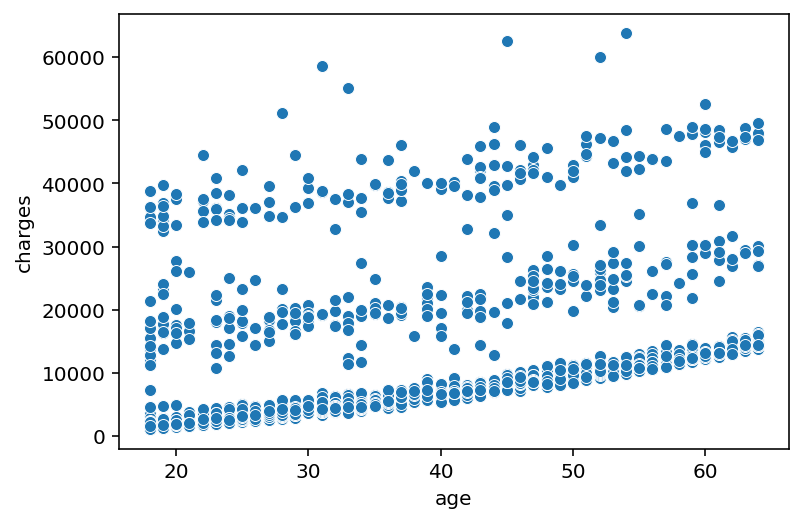

In [21]:
sns.scatterplot(data=data, x='age', y='charges')
plt.show()

- 크게 세 집단이 확인된다.
- 요금별 집단화가 가능하다.

## 3. 데이터 준비

#### 1) 가변수화

In [22]:
cols = ['sex', 'smoker', 'region']
data = pd.get_dummies(data, columns=cols, drop_first=True)

data.head(3)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.90,0,16884.9240,0,1,0,0,1
1,18,33.77,1,1725.5523,1,0,0,1,0
2,28,33.00,3,4449.4620,1,0,0,1,0


#### 2) 상관분석

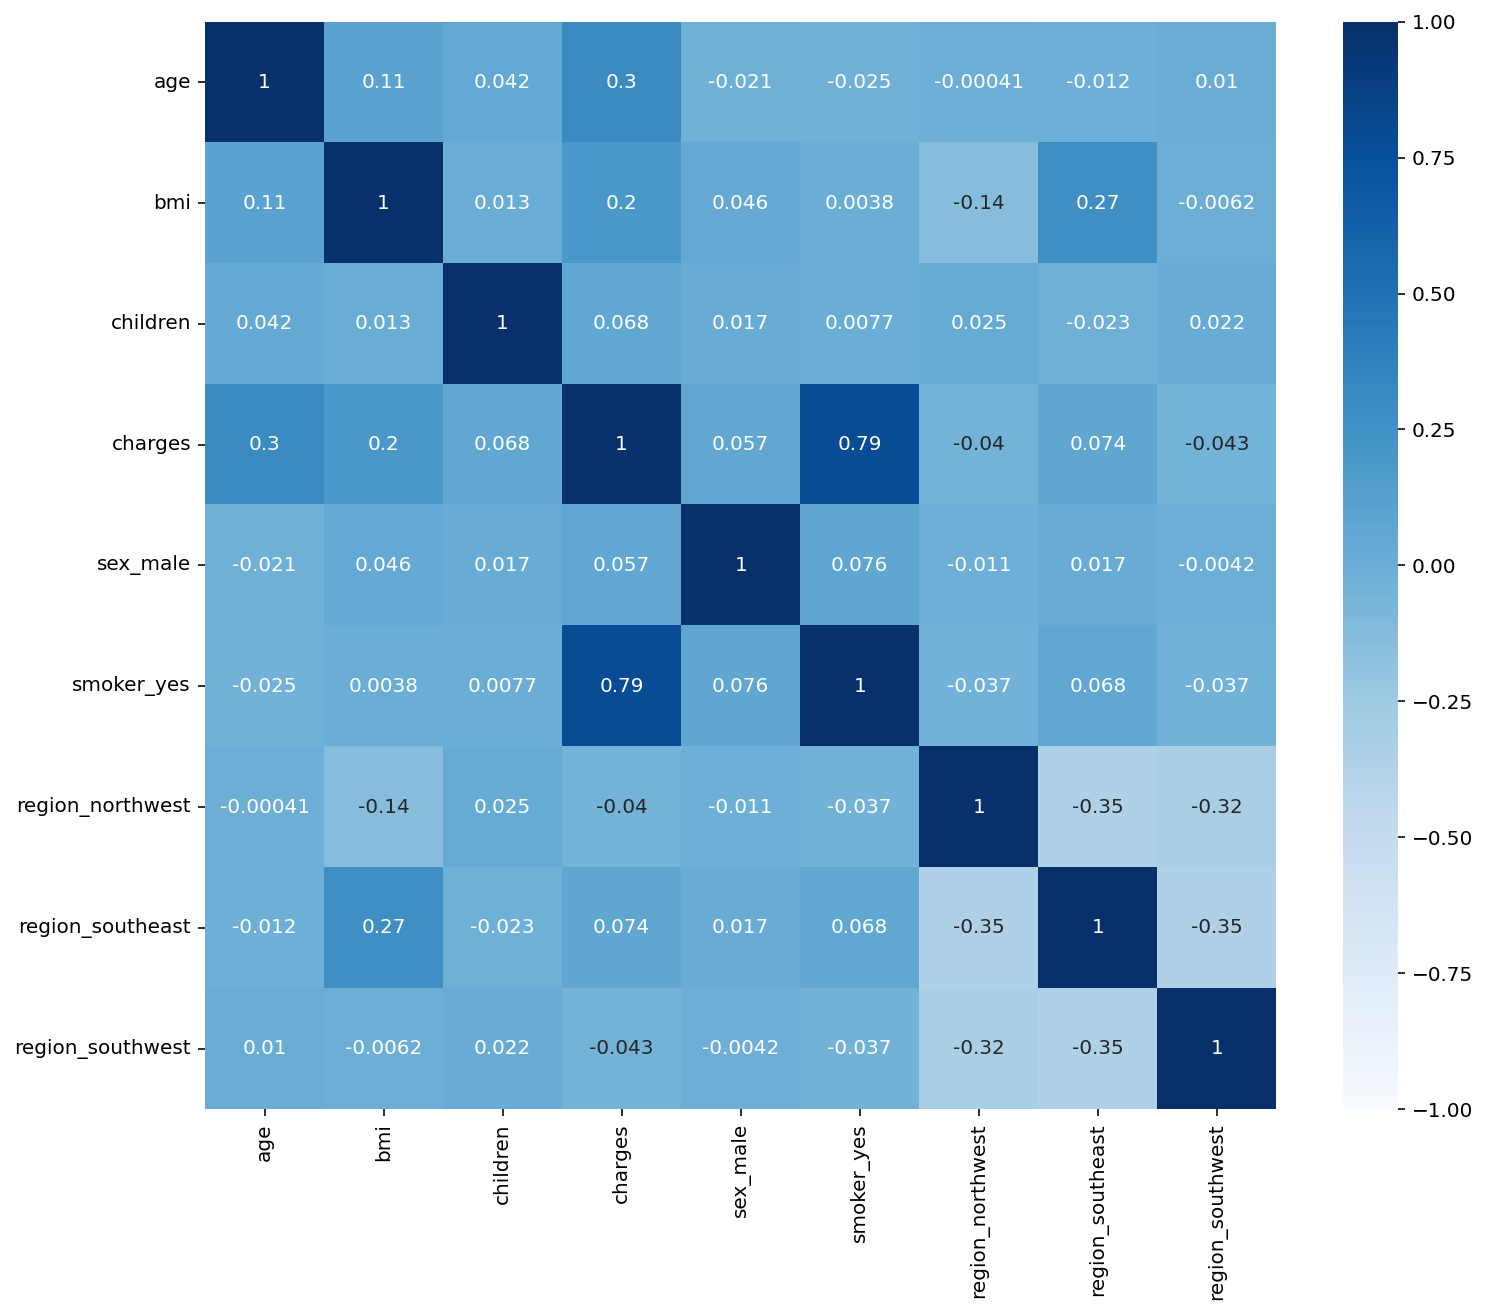

In [25]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),
            annot=True, cmap='Blues',
            vmax=1, vmin=-1)

plt.show()

- 가변수화 전보다 상관관계 값이 상승했다 볼 수 있다.
- age, bmi, smokers_yes 와 charges 관계에 관심

#### 3) x,y 분리

In [26]:
target = 'charges'

x = data.drop(target, axis=1)
y = data[target]

#### 4) train,test 분리

In [27]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=2022)

## 4. 모델링

#### 1) Linear Regression

In [28]:
# 1. 불러오기
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# 2. 선언하기
model = LinearRegression()

In [30]:
# 3. 학습하기
model.fit(x_train,y_train)

LinearRegression()

In [31]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [32]:
# 5. 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 4023.060412326256
r2-score : 0.7815638027456551


회귀계수 확인

In [34]:
# 회귀계수 확인
print('기울기 :', model.coef_)
print('절편 :', model.intercept_)

기울기 : [  243.60038821   306.46006963   472.73303281  -221.31454859
 23707.39225536  -121.77571388 -1088.93802262  -877.25427208]
절편 : -10334.708051219171


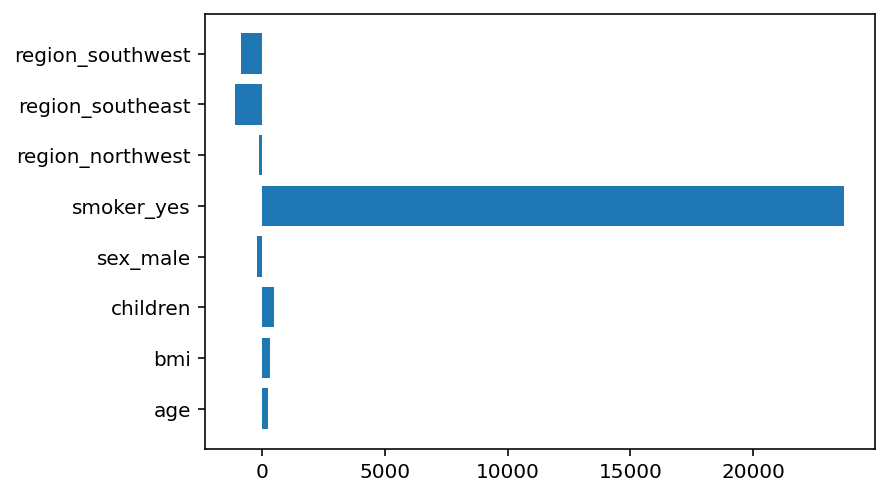

In [35]:
# 변수별 회귀계수 시각화
plt.barh(list(x), model.coef_)

plt.show()

- smokers_yes 가 매우 높은 편이다.
- 나머지 변수는 미비한 편이다.

- 성능정보 수집

In [36]:
score = {}
score['Linear Regression'] = r2_score(y_test,y_pred)

#### 2) Decision Tree

In [37]:
# 1. 불러오기
from sklearn.tree import DecisionTreeRegressor

In [38]:
# 2. 선언하기
model = DecisionTreeRegressor(random_state=2022)

In [39]:
# 3. 학습하기
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=2022)

In [40]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [41]:
# 5. 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2881.683901691543
r2-score : 0.7442120624775168


변수 중요도 확인

In [42]:
model.feature_importances_

array([0.13245768, 0.20970548, 0.01944122, 0.0051565 , 0.61850291,
       0.00548565, 0.00755326, 0.00169731])

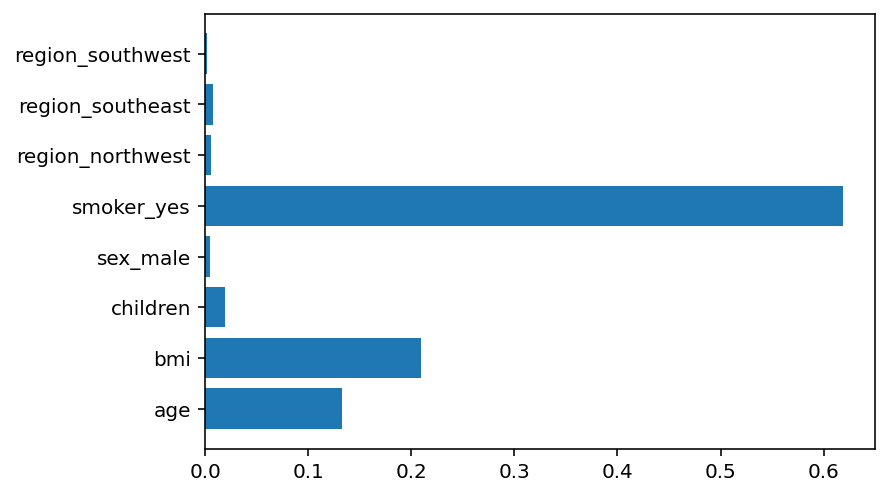

In [43]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)

plt.show()

- smoker_yes 가 매우 높다.
- bmi, age 도 중요한 편이다.

- 성능정보수집

In [44]:
score['Decision Tree'] = r2_score(y_test,y_pred)

#### Random Forest

In [45]:
# 1. 불러오기
from sklearn.ensemble import RandomForestRegressor

In [46]:
# 2. 선언하기
model = RandomForestRegressor(random_state=2022)

In [47]:
# 3. 학습하기
model.fit(x_train,y_train)

RandomForestRegressor(random_state=2022)

In [48]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [49]:
# 5. 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2546.9596018735906
r2-score : 0.8626561004669977


변수 중요도 확인

In [50]:
model.feature_importances_

array([0.13058358, 0.20652291, 0.02258343, 0.00627828, 0.61625573,
       0.00663591, 0.00637816, 0.004762  ])

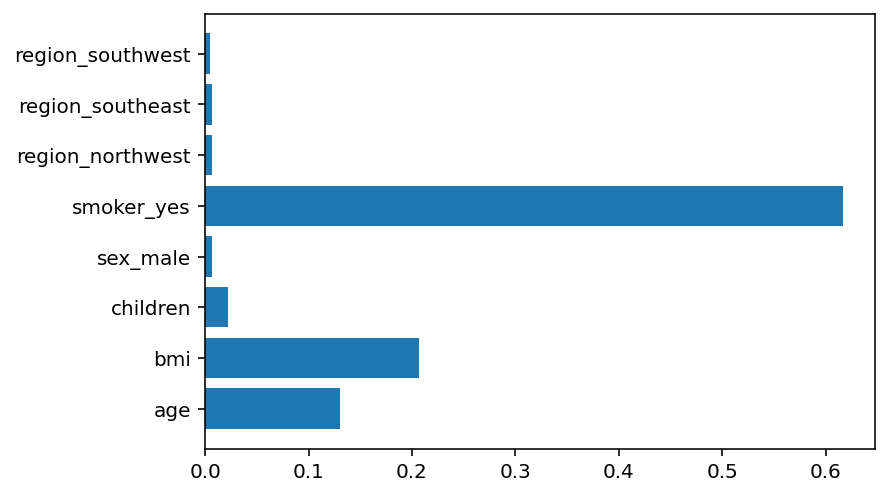

In [51]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- smoker_yes 가 매우 높다.
- bmi, age 도 중요한 편이다.

In [52]:
score['Random Forest'] = r2_score(y_test,y_pred)

#### XGBoost

In [53]:
# 1. 불러오기
from xgboost import XGBRegressor

In [54]:
# 2. 선언하기
model = XGBRegressor(random_state=2022)

In [55]:
# 3. 학습하기
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=2022,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# 4. 예측하기
y_pred = model.predict(x_test)

In [58]:
# 5. 평가하기
print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

MAE : 2983.640758507754
r2-score : 0.8325147792080578


변수 중요도 확인

In [59]:
model.feature_importances_

array([0.01565696, 0.01860508, 0.00777858, 0.0041144 , 0.9380717 ,
       0.00592639, 0.00505249, 0.00479442], dtype=float32)

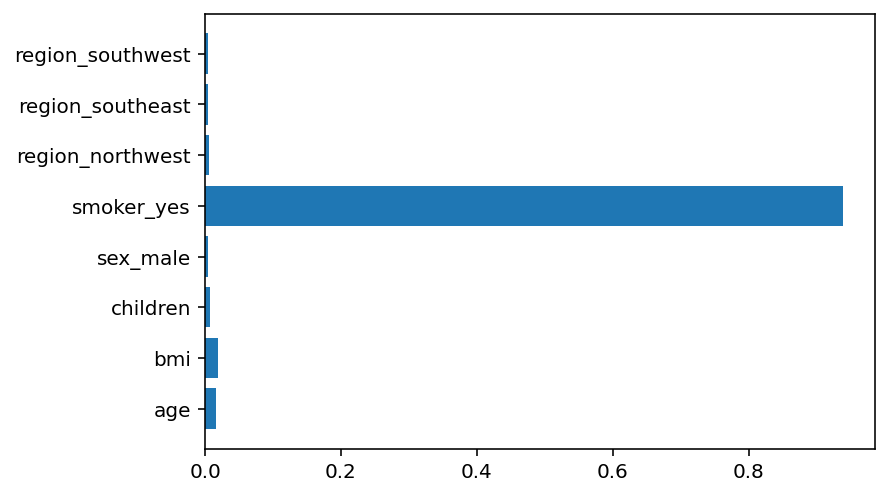

In [60]:
# 변수 중요도 시각화
plt.barh(list(x), model.feature_importances_)
plt.show()

- smokers_yes 가 매우 높은 편이다.
- 다른 변수들은 미비한 편이다.

In [61]:
score['XGBoost'] = r2_score(y_test,y_pred)

#### 모델 정리

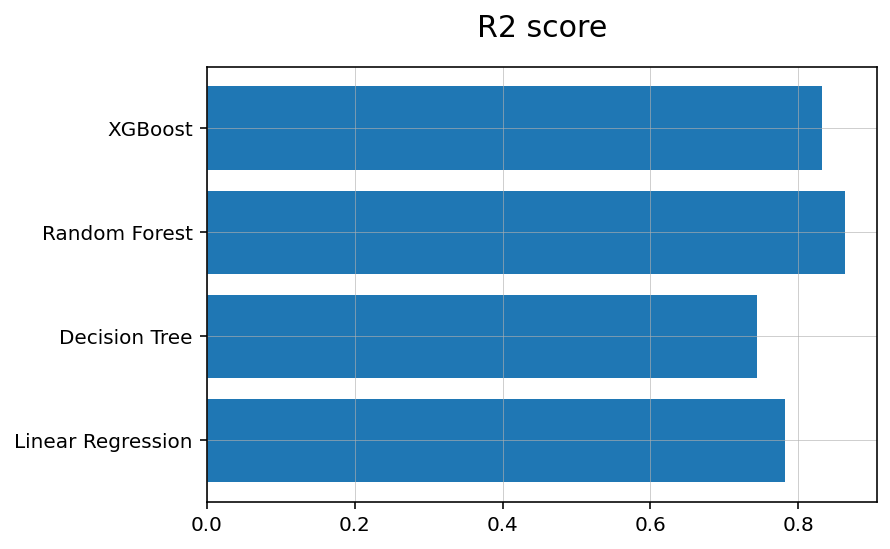

In [70]:
plt.barh(list(score.keys()), score.values())

plt.title('R2 score', size=15, pad=15)
plt.grid(linewidth=0.3)
plt.show()

- Random Forest가 가장 높다.
- Random Forest를 튜닝해볼만 하다. (Random Search & Grid Search)

In [71]:
model.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'enable_categorical': False,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_delta_step': 0,
 'max_depth': 6,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': 8,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 2022,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

## 6. 튜닝

In [73]:
# Random Search
from sklearn.model_selection import RandomizedSearchCV

param = {'max_depth':range(3,11,1), 'n_estimators':range(10,151,10)}

model_rf = RandomForestRegressor(random_state=2022)

model = RandomizedSearchCV(model_rf,
                           param,
                           cv=10,
                           n_iter=20,
                           scoring='r2')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [74]:
print('Random Search mean_test_score')
print(model.cv_results_['mean_test_score'])
print('\n')
print('best_params')
print(model.best_params_)
print('\n')
print('best_score')
print(model.best_score_)

print('-'*70)

print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

Random Search mean_test_score
[0.84631219 0.84081065 0.83884778 0.82107643 0.84250518 0.84333296
 0.82776292 0.84386325 0.83147987 0.83409738 0.84303383 0.84609275
 0.84308362 0.84251778 0.84195179 0.84214951 0.83452132 0.83470329
 0.84554491 0.84280774]


best_params
{'n_estimators': 40, 'max_depth': 4}


best_score
0.8463121936870668
----------------------------------------------------------------------
MAE : 2429.0862885582783
r2-score : 0.8804259862743833


In [75]:
# Grid Search
from sklearn.model_selection import GridSearchCV

param = {'max_depth':range(3,8,1), 'n_estimators':range(20,70,10)}

model_rf = RandomForestRegressor(random_state=2022)

model = GridSearchCV(model_rf,
                     param,
                     cv=10,
                     scoring='r2')

model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [76]:
print('Random Search mean_test_score')
print(model.cv_results_['mean_test_score'])
print('\n')
print('best_params')
print(model.best_params_)
print('\n')
print('best_score')
print(model.best_score_)

print('-'*70)

print('MAE :', mean_absolute_error(y_test,y_pred))
print('r2-score :', r2_score(y_test,y_pred))

Random Search mean_test_score
[0.84214951 0.84194689 0.84216094 0.84239954 0.84232688 0.84554491
 0.84615515 0.84631219 0.84666287 0.84691294 0.84386325 0.84429515
 0.84398096 0.84426942 0.8451345  0.84040473 0.83999772 0.83969196
 0.84052371 0.84158514 0.83452132 0.83440559 0.8360139  0.83724628
 0.83784773]


best_params
{'max_depth': 4, 'n_estimators': 60}


best_score
0.8469129362988592
----------------------------------------------------------------------
MAE : 2422.345698707203
r2-score : 0.8803675664718272


- 0.8626561004669977 -> 0.8804259862743833 -> 0.8803675664718272
- Random Forest -> Random Search -> Grid Search
- RandomSearch의 {'n_estimators': 40, 'max_depth': 4} 가 가장 높다.

- 결국 RandomForest를 RandomSearch로 튜닝한 {'n_estimators': 40, 'max_depth': 4} 값이 가장 예측력이 높다.


- 변수 중 smokers_yes, bmi 등 charges에 영향을 주고 있다.
- 신규고객에 새로운 프로모션을 생길 영향이 있을 것이다.
- 기존고객의 건강상태를 체크 후, 사후관리에 영향을 줄 수 있다.